# Predict Heart Disease

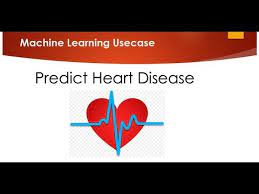

## Import Liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Scikit Learn

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder   ### onrhot convert 0&1
from sklearn.compose import ColumnTransformer#### col tranform
from sklearn.feature_selection import SelectFromModel
import joblib
import datetime 

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression

from collections import Counter
from sklearn import model_selection, naive_bayes, svm, metrics, feature_extraction


## Statsmodel
import statsmodels.api as sm

#ensembling
from mlxtend.classifier import StackingCVClassifier

## Loading the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Nikhil Nandugade\Downloads\framingham.csv")

## Basic Checks

In [3]:
df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

In [4]:
df.tail()

male   age  education  currentSmoker  cigsPerDay  BPMeds  \
4233     1  50.0        1.0              1         1.0     0.0   
4234     1  51.0        3.0              1        43.0     0.0   
4235     0  48.0        2.0              1        20.0     NaN   
4236     0  44.0        1.0              1        15.0     0.0   
4237     0  52.0        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
4233              0.0             1       0.0    313.0  179.0   92.0  25.97   
4234              0.0             0       0.0    207.0  126.5   80.0  19.71   
4235              0.0             0       0.0    248.0  131.0   72.0  22.00   
4236              0.0             0       0.0    210.0  126.5   87.0  19.16   
4237              0.0             0       0.0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
4233       66.0     86.0         1.0  
4234       65.0     68.0         0.0  
4235       84.0     86.0         0.0  
4236       86.0      NaN         0.0  
4237       80.0    107.0         0.0

In [5]:
df.shape

(4238, 16)

In [6]:
df.size

67808

In [7]:
pd.DataFrame(list(df)) 

0
0              male
1               age
2         education
3     currentSmoker
4        cigsPerDay
5            BPMeds
6   prevalentStroke
7      prevalentHyp
8          diabetes
9           totChol
10            sysBP
11            diaBP
12              BMI
13        heartRate
14          glucose
15       TenYearCHD

## Domain Analysis

***Demographic :-***

***• Sex: male or female(Nominal)***

***• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)***

***Behavioral :-***

***• Current Smoker: whether or not the patient is a current smoker (Nominal)***

***• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)***

***Medical( history) :-***

***• BP Meds: whether or not the patient was on blood pressure medication (Nominal)***

***• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)***

***• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)***

***• Diabetes: whether or not the patient had diabetes (Nominal)***

***Medical(current) :-***

***• Tot Chol: total cholesterol level (Continuous)***

***• Sys BP: systolic blood pressure (Continuous)***

***• Dia BP: diastolic blood pressure (Continuous)***

***• BMI: Body Mass Index (Continuous)***

***• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)***

***• Glucose: glucose level (Continuous)***

***Predict variable (desired target) :-***

***• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)***

## Check for Information & Data type 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4234 non-null   float64
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4220 non-null   float64
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4229 non-null   float64
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3849 non-null   float64
 15  TenYearCHD       4237 non-null   float64
dtypes: float64(13), int64(3)
memory usage: 529.9 KB


In [9]:
df.describe()  #### Statistical parameters of Numerical columns

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4234.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.588096     1.978950       0.494101     9.003089   
std       0.495022     8.570984     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4220.000000   4238.000000  4229.000000  4188.000000   
mean      0.029630         0.005924      0.310524     0.025774   236.721585   
std       0.169584         0.076749      0.462763     0.158480    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3849.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.967784   
std      22.038097    11.910850     4.080111    12.026596    23.963026   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4237.000000  
mean      0.151758  
std       0.358829  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [10]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 16)


## Missing value Treatment

In [11]:
df.isnull().sum()

male                 0
age                  4
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke     18
prevalentHyp         0
diabetes             9
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            389
TenYearCHD           1
dtype: int64

<Axes: >

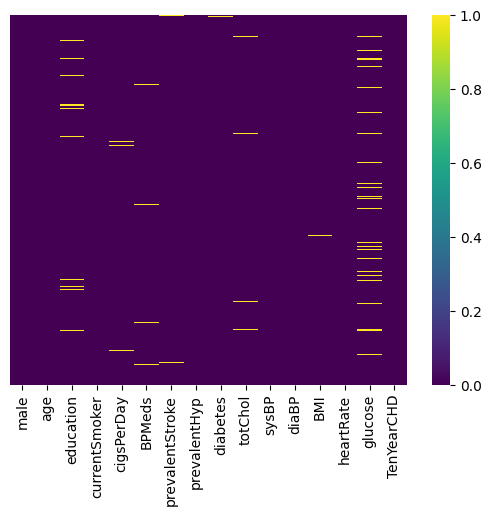

In [12]:
sns.heatmap(df.isnull(),yticklabels= False,cmap="viridis")

In [13]:
def check_missing(x):
    x= x.isnull().sum()*100/ len(x)
    x= x[x>0]
    x= x.sort_values(ascending= False)
    return x
check_missing(df)

glucose            9.178858
education          2.477584
BPMeds             1.250590
totChol            1.179802
cigsPerDay         0.684285
BMI                0.448325
prevalentStroke    0.424729
diabetes           0.212364
age                0.094384
heartRate          0.023596
TenYearCHD         0.023596
dtype: float64

## Filling Missing Values


In [14]:
df["glucose"]

0        77.0
1        76.0
2        70.0
3       103.0
4        85.0
        ...  
4233     86.0
4234     68.0
4235     86.0
4236      NaN
4237    107.0
Name: glucose, Length: 4238, dtype: float64

In [15]:
df["glucose"].describe()

count    3849.000000
mean       81.967784
std        23.963026
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

<Axes: xlabel='glucose', ylabel='Density'>

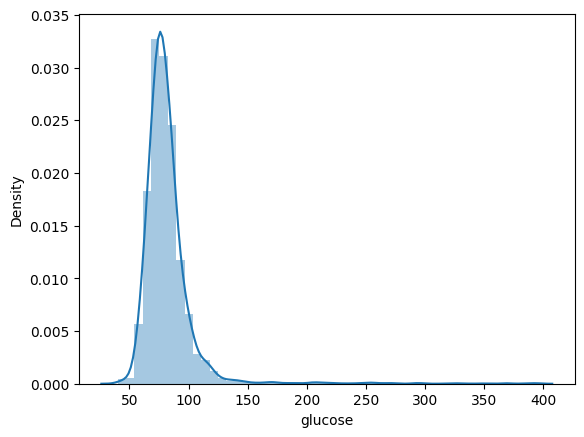

In [16]:
sns.distplot(df["glucose"])    ### to see graph

In [17]:
df["glucose"] = df["glucose"].fillna(78)

In [18]:
check_missing(df)

education          2.477584
BPMeds             1.250590
totChol            1.179802
cigsPerDay         0.684285
BMI                0.448325
prevalentStroke    0.424729
diabetes           0.212364
age                0.094384
heartRate          0.023596
TenYearCHD         0.023596
dtype: float64

In [19]:
df["education"]

0       4.0
1       2.0
2       1.0
3       3.0
4       3.0
       ... 
4233    1.0
4234    3.0
4235    2.0
4236    1.0
4237    2.0
Name: education, Length: 4238, dtype: float64

In [20]:
df["education"].describe()

count    4133.000000
mean        1.978950
std         1.019791
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [21]:
df["education"] =df["education"].fillna(2)

In [22]:
df["BPMeds"].describe()

count    4185.000000
mean        0.029630
std         0.169584
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [23]:
df["BPMeds"] =df["BPMeds"].fillna(0.000)

In [24]:
check_missing(df)

totChol            1.179802
cigsPerDay         0.684285
BMI                0.448325
prevalentStroke    0.424729
diabetes           0.212364
age                0.094384
heartRate          0.023596
TenYearCHD         0.023596
dtype: float64

In [25]:
df["totChol"].describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [26]:
df["totChol"] = df["totChol"].fillna(234.00)

In [27]:
df["cigsPerDay"].describe()

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [28]:
df["cigsPerDay"] = df["cigsPerDay"].fillna(0.00)

In [29]:
df["BMI"].describe()

count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [30]:
df["BMI"] = df["BMI"].fillna(25.400)

In [31]:
check_missing(df)

prevalentStroke    0.424729
diabetes           0.212364
age                0.094384
heartRate          0.023596
TenYearCHD         0.023596
dtype: float64

In [32]:
df["prevalentStroke"].describe()

count    4220.000000
mean        0.005924
std         0.076749
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: prevalentStroke, dtype: float64

In [33]:
df["prevalentStroke"] = df["prevalentStroke"].fillna(0.00)

In [34]:
df["diabetes"].describe()

count    4229.000000
mean        0.025774
std         0.158480
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: diabetes, dtype: float64

In [35]:
df["diabetes"] = df["diabetes"].fillna(0.0000)

In [36]:
df["age"].describe()

count    4234.000000
mean       49.588096
std         8.570984
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

In [37]:
df["age"] =df["age"].fillna(49.00)

In [38]:
df["heartRate"].describe()

count    4237.000000
mean       75.878924
std        12.026596
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [39]:
df["heartRate"] =df["heartRate"].fillna(75.000)

In [40]:
df["TenYearCHD"].describe()

count    4237.000000
mean        0.151758
std         0.358829
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64

In [41]:
df["TenYearCHD"] =df["TenYearCHD"].fillna(0.00)

In [42]:
check_missing(df)

Series([], dtype: float64)

In [43]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

***Doesn't have any null values***

# Explorartory Data Analysis (EDA)

***Uniqueness***

In [44]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}:   {num_distinct_values} distinct values")

male:   2 distinct values
age:   39 distinct values
education:   4 distinct values
currentSmoker:   2 distinct values
cigsPerDay:   33 distinct values
BPMeds:   2 distinct values
prevalentStroke:   2 distinct values
prevalentHyp:   2 distinct values
diabetes:   2 distinct values
totChol:   248 distinct values
sysBP:   234 distinct values
diaBP:   146 distinct values
BMI:   1363 distinct values
heartRate:   73 distinct values
glucose:   143 distinct values
TenYearCHD:   2 distinct values


In [45]:
import pandas_profiling as pp

In [46]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: ylabel='count'>

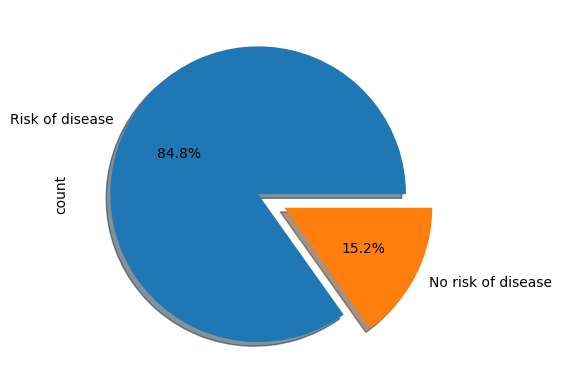

In [47]:
#Pie chart of data
df['TenYearCHD'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True,labels=['Risk of disease', 'No risk of disease'])

***Seems that 15.2% of people have 10-year risk of future coronary heart disease. This also tells that the data is skewed which we will handle later.***

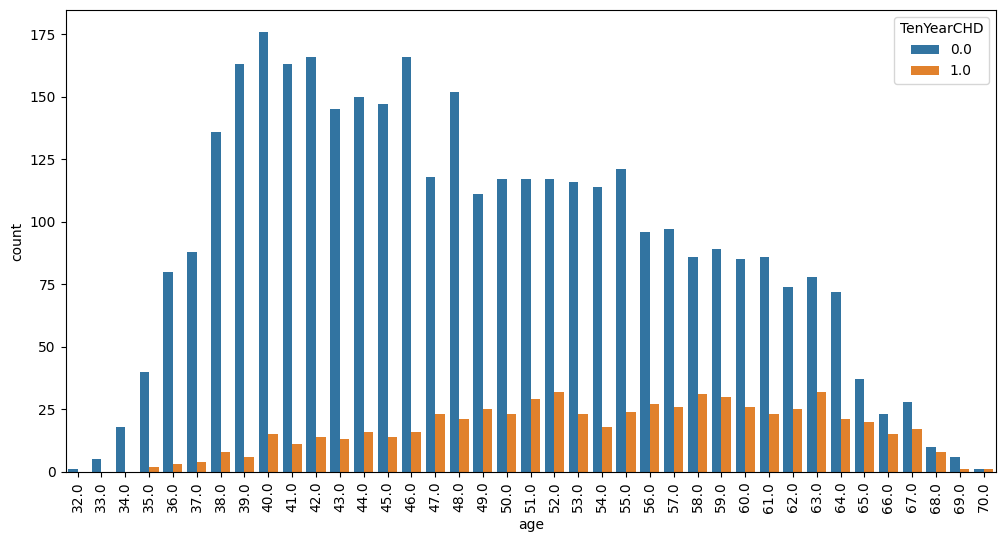

In [48]:
#Plotting histogram of age with respect to TenYearCHD
plt.figure(figsize=(12, 6))
sns.countplot(x="age", hue='TenYearCHD', data=df)
plt.xticks(rotation=90)  
plt.show()

***There seems to be increased risk with age***

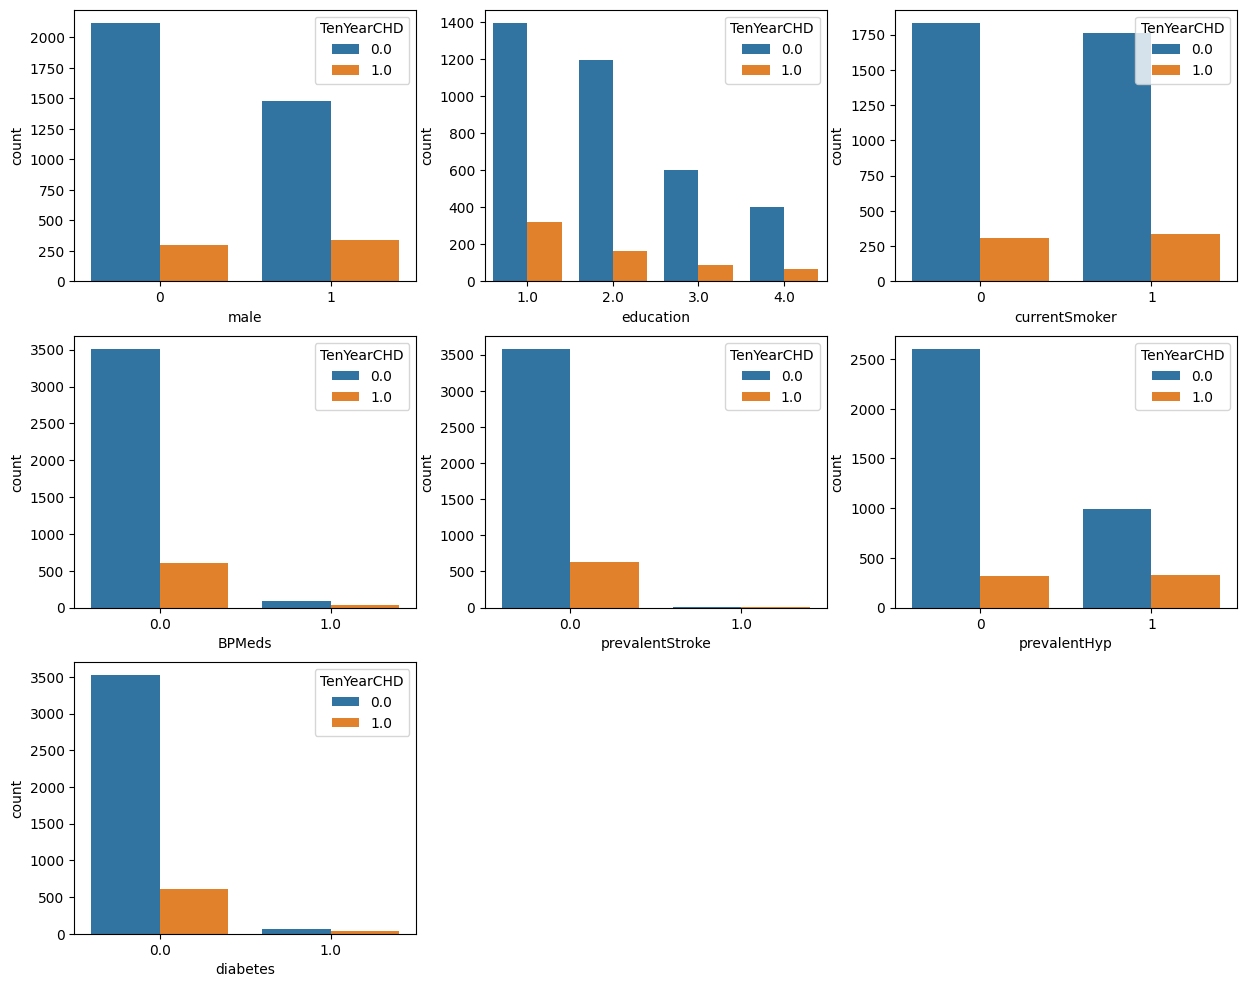

In [49]:
plt.figure(figsize=(15, 12))

plt.subplot(3,3,1)
sns.countplot(x='male', hue='TenYearCHD', data=df)

# Repeat the same change for the remaining sns.countplot calls
plt.subplot(3,3,2)
sns.countplot(x='education', hue='TenYearCHD', data=df)
plt.subplot(3,3,3)
sns.countplot(x='currentSmoker', hue='TenYearCHD', data=df)
plt.subplot(3,3,4)
sns.countplot(x='BPMeds', hue='TenYearCHD', data=df)
plt.subplot(3,3,5)
sns.countplot(x='prevalentStroke', hue='TenYearCHD', data=df)
plt.subplot(3,3,6)
sns.countplot(x='prevalentHyp', hue='TenYearCHD', data=df)
plt.subplot(3,3,7)
sns.countplot(x='diabetes', hue='TenYearCHD', data=df)

plt.show()

***There seems to be a slighlty higher risk if its a male.***

***The more educated people are the lower their risk. Makes sense as they have more knowledge on how to take care of themselves.***

***Risk is the same for both smoker and non-smoker***

***People taking BPMeds have a higher risk.***

***People that have had a stroke are at greater risk.***

***People who are hypertensive are at greater risk.***

***People with diabetes are at a higher risk.***

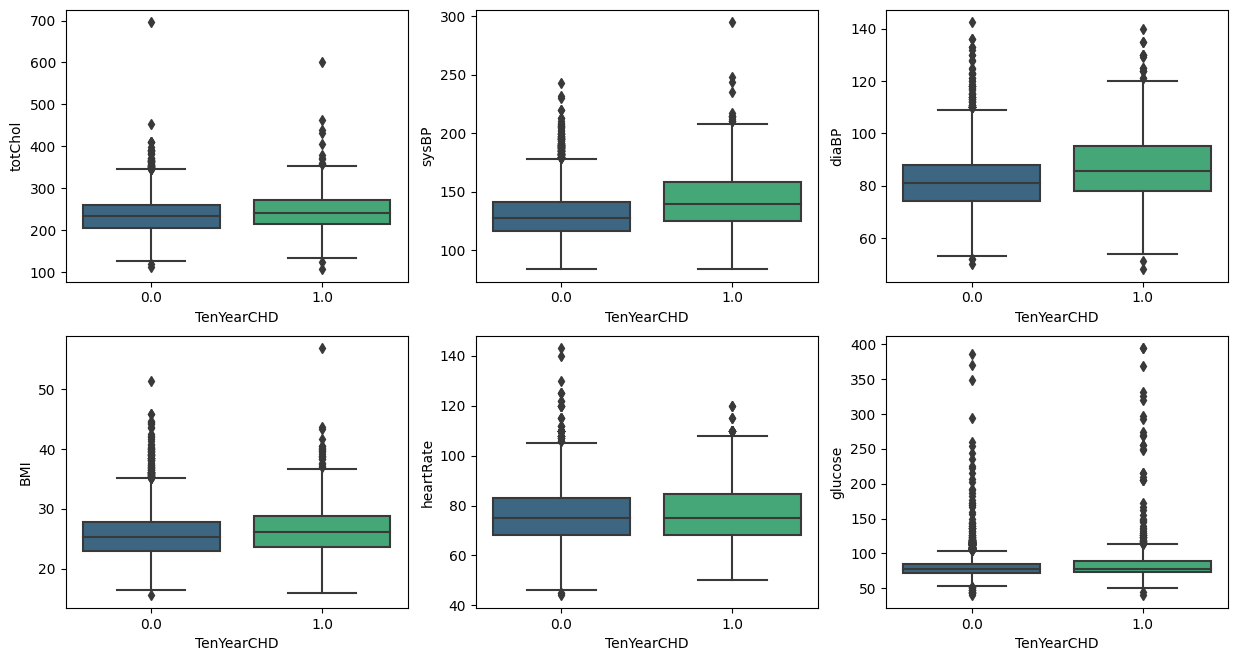

In [50]:
plt.figure(figsize=(15, 12))

plt.subplot(3,3,1)
sns.boxplot(x='TenYearCHD', y='totChol', data=df, palette='viridis')
plt.subplot(3,3,2)
sns.boxplot(x='TenYearCHD', y='sysBP', data=df, palette='viridis')
plt.subplot(3,3,3)
sns.boxplot(x='TenYearCHD', y='diaBP', data=df, palette='viridis')
plt.subplot(3,3,4)
sns.boxplot(x='TenYearCHD', y='BMI', data=df, palette='viridis')
plt.subplot(3,3,5)
sns.boxplot(x='TenYearCHD', y='heartRate', data=df, palette='viridis')
plt.subplot(3,3,6)
sns.boxplot(x='TenYearCHD', y='glucose', data=df, palette='viridis')

plt.show()

***People with risk of CHD seem to have slighlty elevated cholestrol levels***

***People with risk of CHD seem to have elevated levels of systolic blood pressure (sysBP)***

***People with risk of CHD seem to have elevated levels of diastolic blood pressure (diaBP)***

***People with risk of CHD seem to have slighlty elevated BMI***

***People with risk of CHD seem to have slighlty elevated heart rate***

***People with risk of CHD seem to have slighlty elevated glucose levels***

<Axes: >

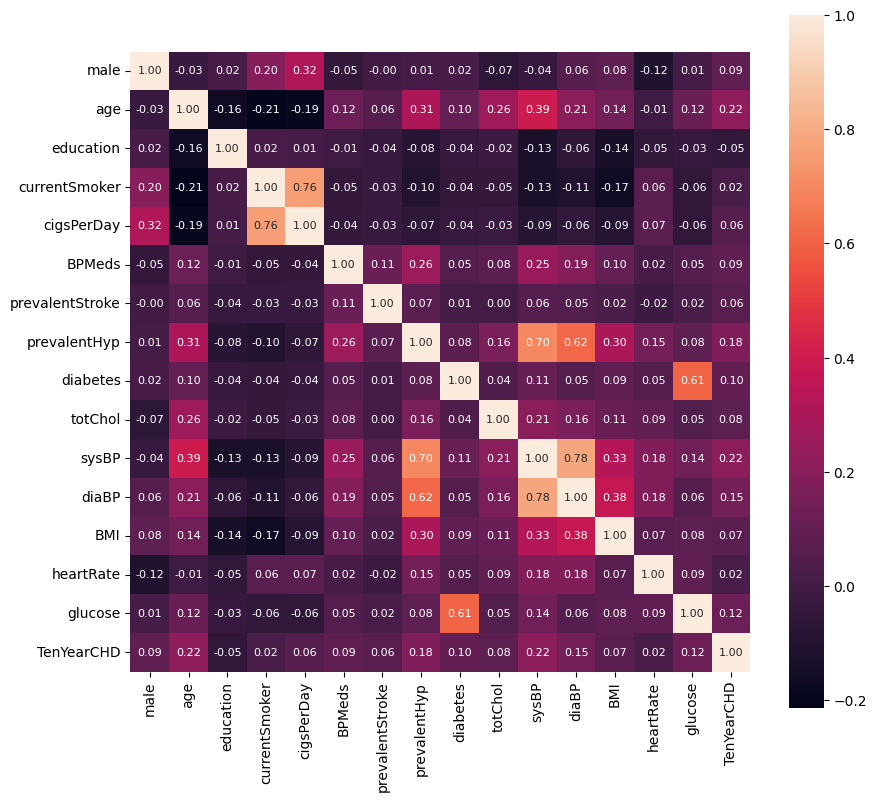

In [51]:
corr = df.corr()

plt.figure(figsize = (10,9))
sns.heatmap(corr,cbar = True,square = True,fmt = ".2f",annot = True,annot_kws={'size':8})

In [52]:
df

male   age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1  39.0        4.0              0         0.0     0.0   
1        0  46.0        2.0              0         0.0     0.0   
2        1  48.0        1.0              1        20.0     0.0   
3        0  61.0        3.0              1        30.0     0.0   
4        0  46.0        3.0              1        23.0     0.0   
...    ...   ...        ...            ...         ...     ...   
4233     1  50.0        1.0              1         1.0     0.0   
4234     1  51.0        3.0              1        43.0     0.0   
4235     0  48.0        2.0              1        20.0     0.0   
4236     0  44.0        1.0              1        15.0     0.0   
4237     0  52.0        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                 0.0             0       0.0    195.0  106.0   70.0  26.97   
1                 0.0             0       0.0    250.0  121.0   81.0  28.73   
2                 0.0             0       0.0    245.0  127.5   80.0  25.34   
3                 0.0             1       0.0    225.0  150.0   95.0  28.58   
4                 0.0             0       0.0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233              0.0             1       0.0    313.0  179.0   92.0  25.97   
4234              0.0             0       0.0    207.0  126.5   80.0  19.71   
4235              0.0             0       0.0    248.0  131.0   72.0  22.00   
4236              0.0             0       0.0    210.0  126.5   87.0  19.16   
4237              0.0             0       0.0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0         0.0  
1          95.0     76.0         0.0  
2          75.0     70.0         0.0  
3          65.0    103.0         1.0  
4          85.0     85.0         0.0  
...         ...      ...         ...  
4233       66.0     86.0         1.0  
4234       65.0     68.0         0.0  
4235       84.0     86.0         0.0  
4236       86.0     78.0         0.0  
4237       80.0    107.0         0.0  

[4238 rows x 16 columns]

# Train Test Split

In [53]:
x = df.drop(["TenYearCHD"],axis=1)
y= df["TenYearCHD"]

In [54]:
x

male   age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1  39.0        4.0              0         0.0     0.0   
1        0  46.0        2.0              0         0.0     0.0   
2        1  48.0        1.0              1        20.0     0.0   
3        0  61.0        3.0              1        30.0     0.0   
4        0  46.0        3.0              1        23.0     0.0   
...    ...   ...        ...            ...         ...     ...   
4233     1  50.0        1.0              1         1.0     0.0   
4234     1  51.0        3.0              1        43.0     0.0   
4235     0  48.0        2.0              1        20.0     0.0   
4236     0  44.0        1.0              1        15.0     0.0   
4237     0  52.0        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                 0.0             0       0.0    195.0  106.0   70.0  26.97   
1                 0.0             0       0.0    250.0  121.0   81.0  28.73   
2                 0.0             0       0.0    245.0  127.5   80.0  25.34   
3                 0.0             1       0.0    225.0  150.0   95.0  28.58   
4                 0.0             0       0.0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233              0.0             1       0.0    313.0  179.0   92.0  25.97   
4234              0.0             0       0.0    207.0  126.5   80.0  19.71   
4235              0.0             0       0.0    248.0  131.0   72.0  22.00   
4236              0.0             0       0.0    210.0  126.5   87.0  19.16   
4237              0.0             0       0.0    269.0  133.5   83.0  21.47   

      heartRate  glucose  
0          80.0     77.0  
1          95.0     76.0  
2          75.0     70.0  
3          65.0    103.0  
4          85.0     85.0  
...         ...      ...  
4233       66.0     86.0  
4234       65.0     68.0  
4235       84.0     86.0  
4236       86.0     78.0  
4237       80.0    107.0  

[4238 rows x 15 columns]

In [55]:
y

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
4233    1.0
4234    0.0
4235    0.0
4236    0.0
4237    0.0
Name: TenYearCHD, Length: 4238, dtype: float64

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 0)

In [57]:
scaler = StandardScaler()

In [58]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

***Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem***

In [59]:
print(y_test.unique())
Counter(y_train)

[0. 1.]


Counter({0.0: 2885, 1.0: 505})

# Model Building

***Here I take different machine learning algorithm and try to find algorithm which predict accurately.***

***1) Logistic Regression***

***2) Support Vector Machine***

***3) Naive Bayes***

***4) K-Nearest Neighbour***

# 1) Logistic Regression

In [60]:
log = LogisticRegression()

In [61]:
log.fit(x_train,y_train)

LogisticRegression()

In [62]:
print(log.coef_)

[[ 0.21758478  0.51941681 -0.00699497  0.02096404  0.27163201  0.01669725
   0.08492191  0.16096764  0.05450107  0.09523635  0.2963731  -0.08996123
   0.03731618 -0.02272531  0.12661266]]


In [63]:
print(log.intercept_)

[-1.99756781]


In [64]:
print("Train Score: ",log.score(x_train,y_train))

Train Score:  0.8595870206489675


In [65]:
print("Test Score: ",log.score(x_test,y_test))

Test Score:  0.8455188679245284


In [66]:
pred_train = log.predict(x_train)
pred_test = log.predict(x_test)

In [67]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      2885
         1.0       0.77      0.08      0.15       505

    accuracy                           0.86      3390
   macro avg       0.82      0.54      0.54      3390
weighted avg       0.85      0.86      0.81      3390



In [68]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       710
         1.0       0.82      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.84      0.85      0.79       848



In [69]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[708   2]
 [129   9]]


Accuracy of Logistic Regression: 84.55188679245283 

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       710
         1.0       0.82      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.84      0.85      0.79       848



# AUC- ROC Curve and AUC- ROC Score

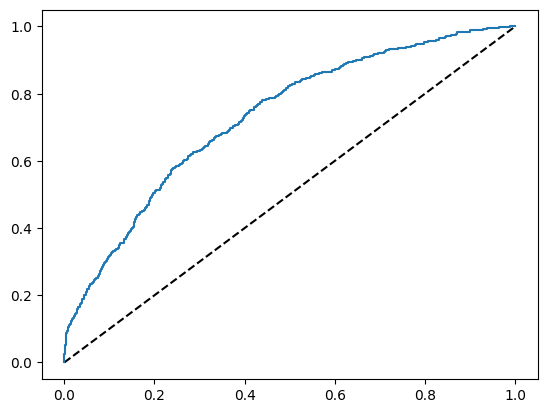

In [70]:
roc = log.predict_proba(x_train)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_train,roc)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Logistic")
plt.show()

In [71]:
metrics.roc_auc_score(y_train,roc)

0.7292873689448667

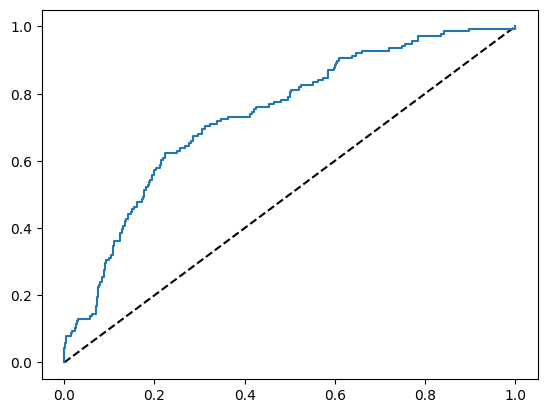

In [72]:
rocc = log.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test,rocc)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Logistic")
plt.show()

In [73]:
metrics.roc_auc_score(y_test,rocc)

0.7376913655848133

# Matthew's Correlation of Coefficients

In [74]:
mcc = matthews_corrcoef(y_test, pred_test)
print("MCC: " , mcc)

MCC:  0.20356243875950514


# Confusion Matrix

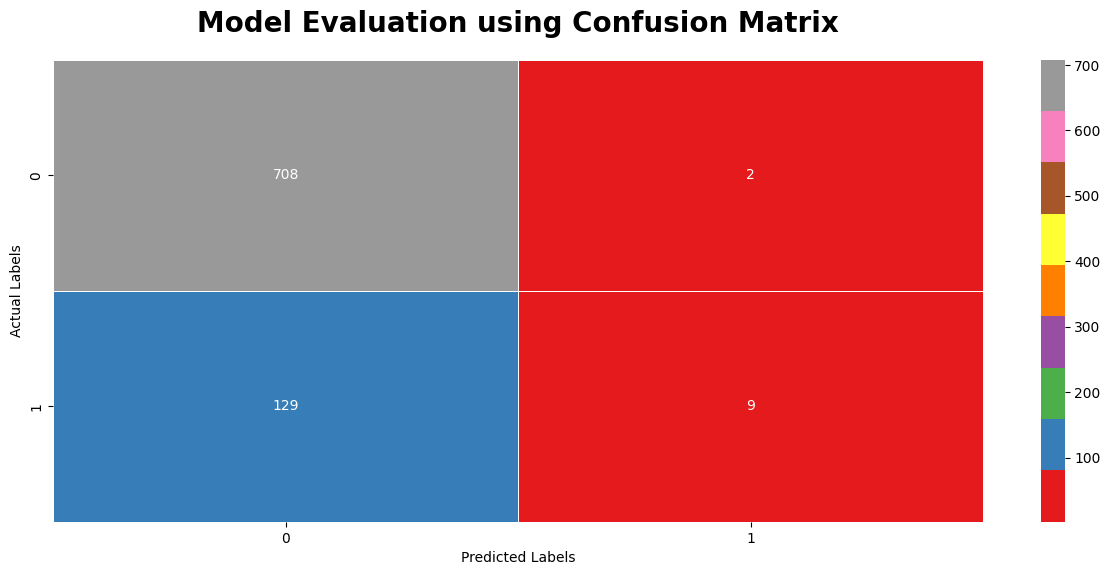

In [75]:
y_test_pred = log.predict(x_test)
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# GridSearchCV

In [76]:
param_grid = {
    "penalty": ["l1","l2"],
    "C" : [0.1,0.5,1,5,10]
}

In [77]:
grid = GridSearchCV(estimator=log,param_grid=param_grid,cv=5)

In [78]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [79]:
best_param = grid.best_params_
best_model = grid.best_estimator_

In [80]:
y_pred =best_model.predict(x_test)

In [81]:
acc= accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec= recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [82]:
print("Best Param:",best_param)
print("Accuracy :" , acc)
print("precision:" ,pre)
print("Recall:", rec)
print("F1 Score:" , f1)
print("AUC-ROC:", roc_auc)

Best Param: {'C': 0.5, 'penalty': 'l2'}
Accuracy : 0.8455188679245284
precision: 0.8181818181818182
Recall: 0.06521739130434782
F1 Score: 0.12080536912751678
AUC-ROC: 0.5312002449479486


# 2) SVM

In [83]:
svcm = SVC(kernel= 'linear')  ## linear,rbf,poly,sigmoid, we can applide

In [84]:
svcm.fit(x_train,y_train)

SVC(kernel='linear')

In [85]:
y_pred = svcm.predict(x_test)

In [86]:
acc= accuracy_score(y_test,y_pred)
acc

0.8372641509433962

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       710
         1.0       0.00      0.00      0.00       138

    accuracy                           0.84       848
   macro avg       0.42      0.50      0.46       848
weighted avg       0.70      0.84      0.76       848



In [88]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
svc_predicted = svc.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[707   3]
 [128  10]]


Accuracy of Support Vector Classifier: 84.55188679245283 

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       710
         1.0       0.77      0.07      0.13       138

    accuracy                           0.85       848
   macro avg       0.81      0.53      0.52       848
weighted avg       0.83      0.85      0.79       848



# Confusion Matrix

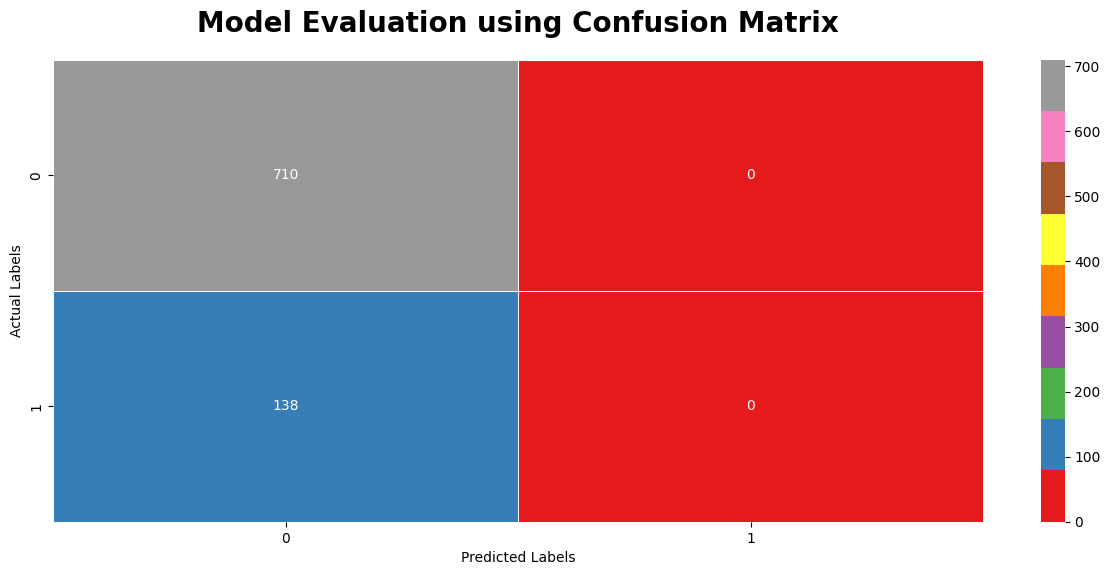

In [89]:
y_test_pred = svcm.predict(x_test)
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# AUC- ROC Curve and AUC- ROC Score

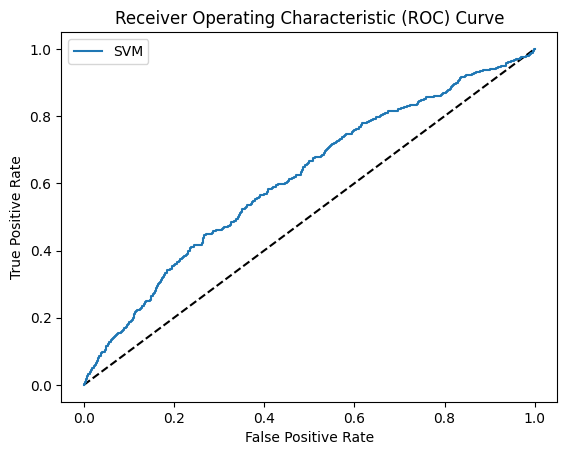

In [90]:
from sklearn import metrics
roc = svcm.decision_function(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, roc)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label="SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [91]:
metrics.roc_auc_score(y_train,roc)

0.6137666660946857

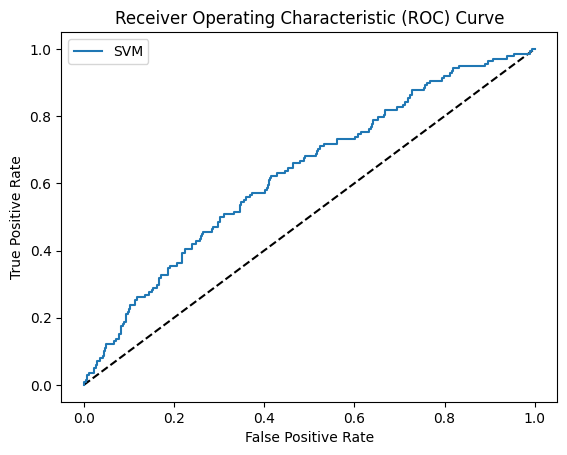

In [92]:
rocc = svcm.decision_function(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, rocc)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label="SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [93]:
metrics.roc_auc_score(y_test,rocc)

0.6295366401306389

In [94]:
print("Test Score:",metrics.roc_auc_score(y_test,y_pred))

Test Score: 0.5


# GridSearchCV

In [95]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'kernel': ['linear']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.851 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.845 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.851 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.851 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.851 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.851 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.845 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.851 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.851 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.851 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.851 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

KeyboardInterrupt: 

***System Take lots of Time, that's why Skip this code***

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

In [ ]:
grid_predictions = grid.predict(x_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 

# 3) Naive Bayes

In [96]:
bayes = naive_bayes.GaussianNB()

In [97]:
bayes.fit(x_train, y_train)

GaussianNB()

In [98]:
y_pred_bayes = bayes.predict(x_test)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print("Accuracy (Naive Bayes):", accuracy_bayes)
print("Classification Report (Naive Bayes):")

print(classification_report(y_test, y_pred_bayes))

Accuracy (Naive Bayes): 0.8207547169811321
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       710
         1.0       0.41      0.22      0.28       138

    accuracy                           0.82       848
   macro avg       0.63      0.58      0.59       848
weighted avg       0.79      0.82      0.80       848



In [99]:
acc = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : {:.2f}%".format(acc*100))

Accuracy : 83.73%


In [100]:
m2 = 'Naive Bayes'
nb = naive_bayes.GaussianNB()
nb.fit(x_train,y_train)
nbpred = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[666  44]
 [108  30]]


Accuracy of Naive Bayes model: 82.0754716981132 

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       710
         1.0       0.41      0.22      0.28       138

    accuracy                           0.82       848
   macro avg       0.63      0.58      0.59       848
weighted avg       0.79      0.82      0.80       848



# AUC- ROC Curve and AUC- ROC Score

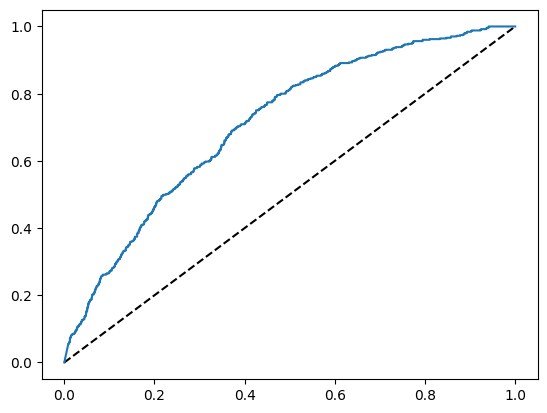

In [101]:
roc_c = bayes.predict_proba(x_train)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_train,roc_c)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Naive Bayes")
plt.show()

In [102]:
metrics.roc_auc_score(y_train,roc_c)

0.7117168007961975

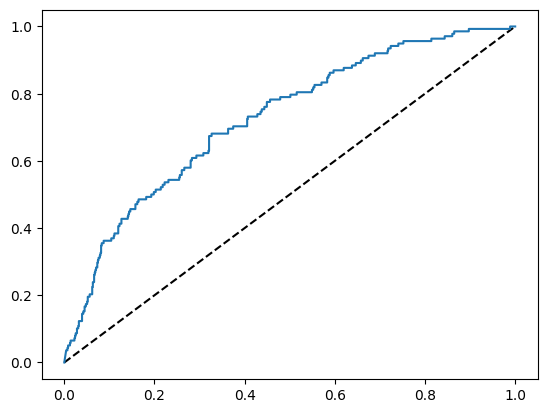

In [103]:
rocc_c = bayes.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test,rocc_c)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "Naive Bayes")
plt.show()

In [104]:
metrics.roc_auc_score(y_test,rocc_c)

0.7253163911002245

# Confusion Matrix For Naive Bayes


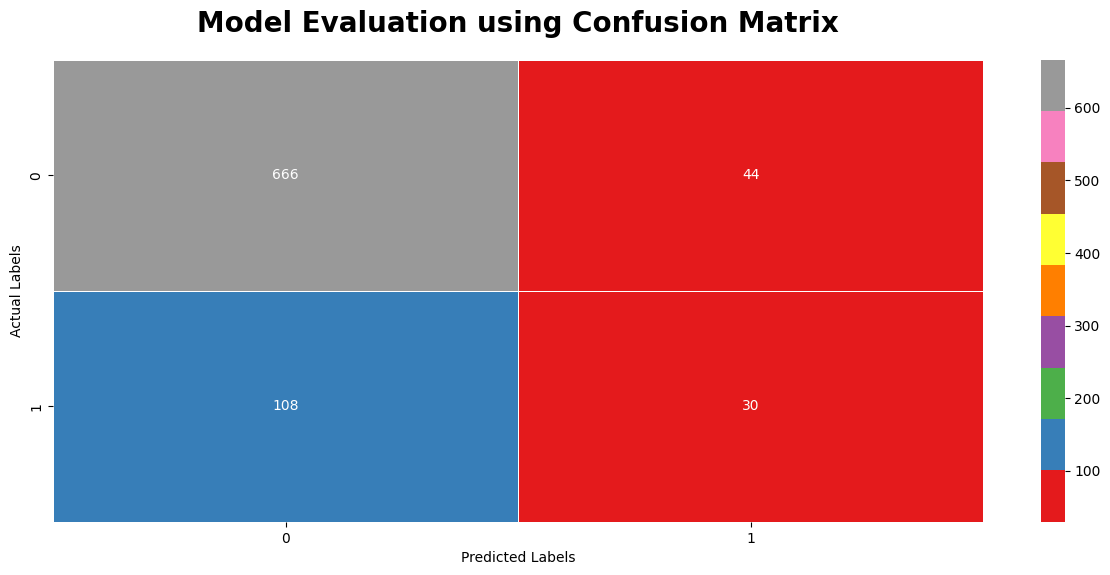

In [105]:
y_test_pred = bayes.predict(x_test)
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# GridSearchCV For Naive Bayes


In [106]:
from sklearn.naive_bayes import BernoulliNB  # Import BernoulliNB class
from sklearn.model_selection import GridSearchCV
n_classes = len(np.unique(y_train))

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* (n_classes), ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(x_train,y_train)

print('Best Parameters : {}'.format(bernoulli_nb_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(bernoulli_nb_grid.best_score_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters : {'alpha': 0.01, 'binarize': 8.5, 'class_prior': None, 'fit_prior': False}
Best Accuracy Through Grid Search : 0.851



In [107]:
grid_predictionss = bernoulli_nb_grid.predict(x_test) 

# print classification report 
print(classification_report(y_test, grid_predictionss)) 

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       710
         1.0       0.40      0.01      0.03       138

    accuracy                           0.84       848
   macro avg       0.62      0.51      0.47       848
weighted avg       0.77      0.84      0.77       848



# 4) K-Nearest Neighbour

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [109]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [110]:
knn.score(x_test,y_test)

0.839622641509434

In [111]:
y_pred_knn= knn.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (Naive Bayes):", accuracy_knn)
print("Classification Report (knn):")
print(classification_report(y_test, y_pred))

Accuracy (Naive Bayes): 0.839622641509434
Classification Report (knn):
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       710
         1.0       0.00      0.00      0.00       138

    accuracy                           0.84       848
   macro avg       0.42      0.50      0.46       848
weighted avg       0.70      0.84      0.76       848



In [112]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[709   1]
 [135   3]]


Accuracy of K-NeighborsClassifier: 83.9622641509434 

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       710
         1.0       0.75      0.02      0.04       138

    accuracy                           0.84       848
   macro avg       0.80      0.51      0.48       848
weighted avg       0.83      0.84      0.77       848



# AUC- ROC Curve and AUC- ROC Score

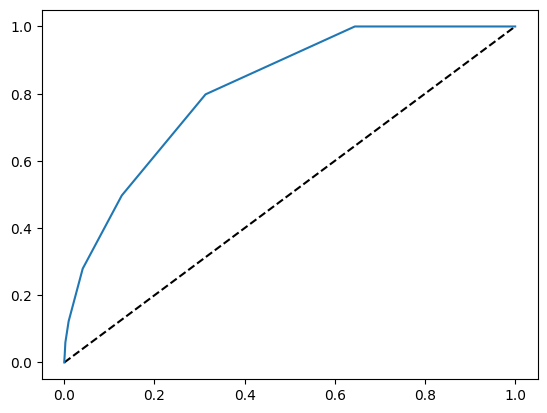

In [113]:
roc_c = knn.predict_proba(x_train)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_train,roc_c)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "K- NN")
plt.show()

In [114]:
metrics.roc_auc_score(y_train,roc_c)

0.814164421641471

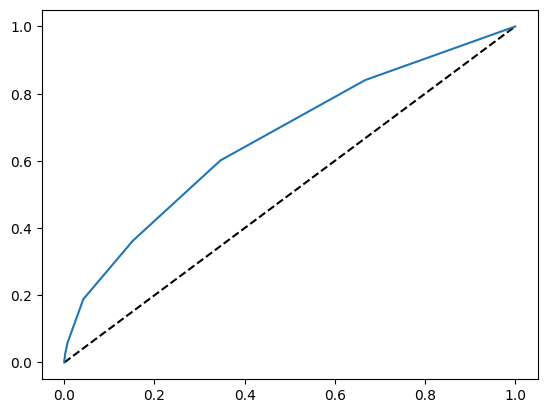

In [115]:
rocc_c = knn.predict_proba(x_test)[:,1]

fpr,tpr,threshold = metrics.roc_curve(y_test,rocc_c)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label= "K-NN")
plt.show()

In [116]:
metrics.roc_auc_score(y_test,rocc_c)

0.6659267197387222

# Confusion Matrix

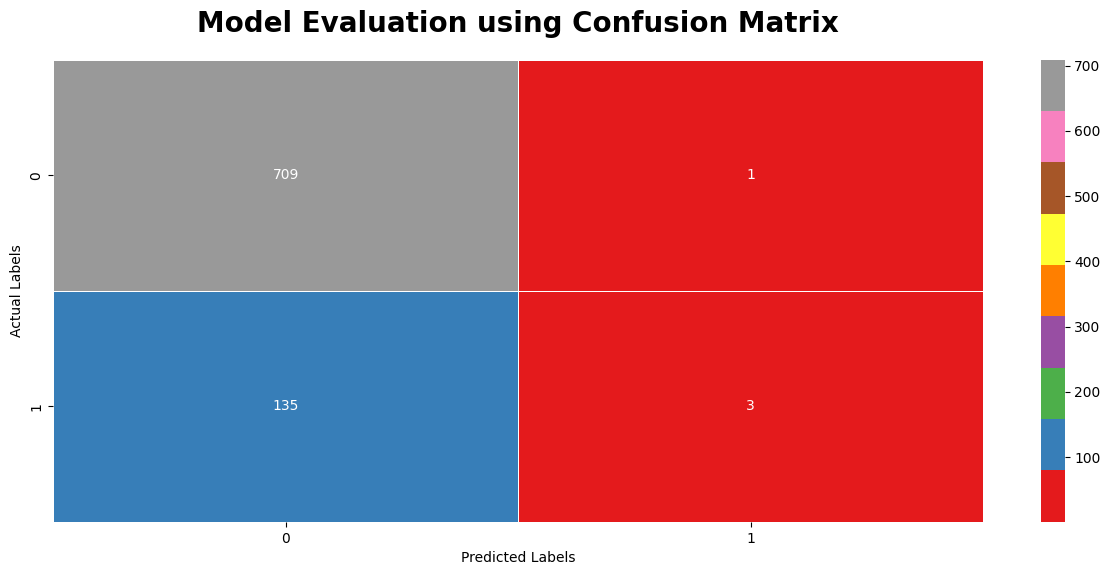

In [117]:
cm = confusion_matrix(y_test,y_pred_knn)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

# GridSearchCV

In [118]:
# Define the hyperparameters to search through
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting type
    'p': [1, 2]  # Distance metric (1 for Manhattan, 2 for Euclidean)
}
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(x, y)

# Print the best hyperparameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters:  {'n_neighbors': 19, 'p': 2, 'weights': 'uniform'}
Best Accuracy:  0.8504004143369495


# Operating Characterstic Curve

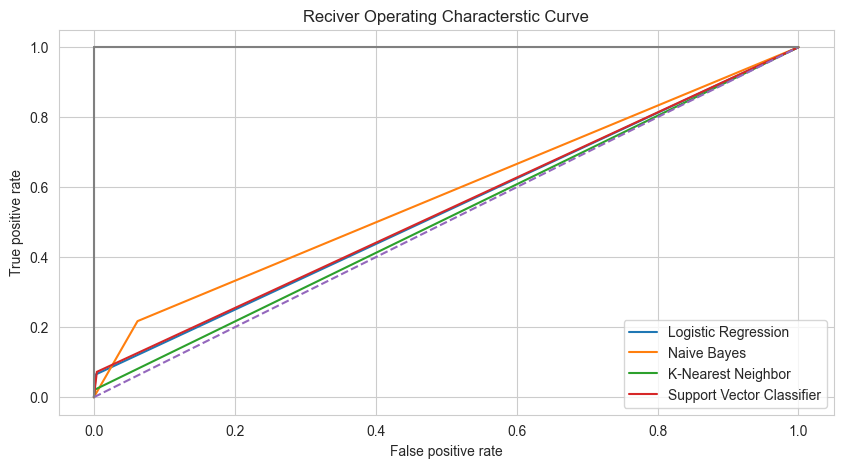

In [119]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
                                                            

knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)

svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')


plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')

plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Model Evaluation


In [120]:
model_E = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes',
                    'K-Nearest Neighbour','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,knn_acc_score*100,svc_acc_score*100]})
model_E

Model   Accuracy
0     Logistic Regression  84.551887
1             Naive Bayes  82.075472
2     K-Nearest Neighbour  83.962264
3  Support Vector Machine  84.551887

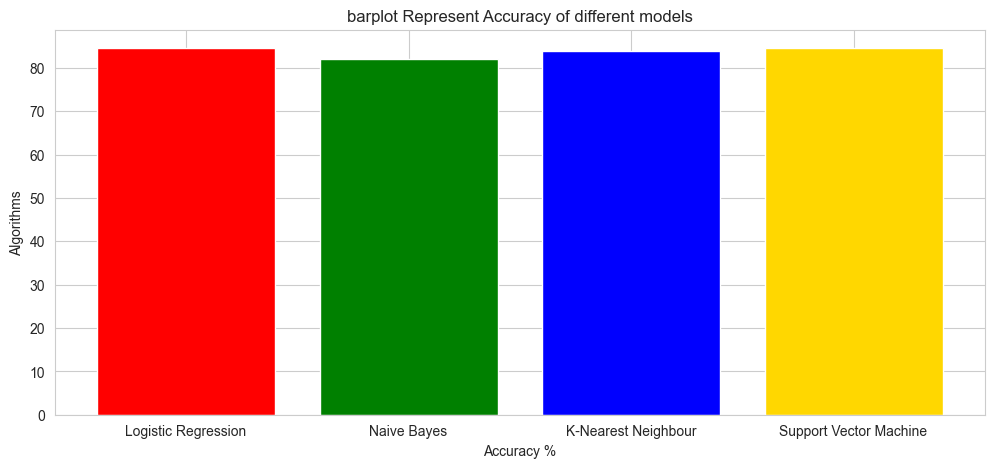

In [121]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_E['Model'],model_E['Accuracy'],color = colors)
plt.show()

# Model Evaluation After Tunning

In [122]:
lrr_acc_score = 0.8181
nbb_acc_score = 0.851
knnn_acc_score = 0.850
svm_acc_score = 0.8181

In [123]:
model_ET = pd.DataFrame({'Model After Tunning': ['Logistic Regression','Naive Bayes',
                    'K-Nearest Neighbour','Support Vector Machine'], 'Accuracy': [lrr_acc_score*100,
                    nbb_acc_score*100,knnn_acc_score*100,svm_acc_score*100]})
model_ET

Model After Tunning  Accuracy
0     Logistic Regression     81.81
1             Naive Bayes     85.10
2     K-Nearest Neighbour     85.00
3  Support Vector Machine     81.81

# Conclusion

***1) Extreme Logistic Regression & Support Vector Machine gives the best Accuracy compared to other models.***

***2) Naive Bayes & K-Nearest Neighbour gives the best Accuracy After Tunning.***

***3) Exercise induced angina,Chest pain is major symptoms of heart attack.***